<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Project  </font></p>
<p><font size="4">  BALLAND Nolan, GUILLOUARD Joshua, LAMECHE Sami, LELOUCHE Alexander  </font></p>
</p>
</CENTER>

----------------------------

**Table of contents**

* [1. Setup](#1.-Setup)
* [2. Chronic Kidney Disease](#2.-Chronic-Kidney-Disease)
    + [2.1 Preprocessing](#2.1-Preprocessing)
    + [2.2 Explore Data](#2.2-Explore-Data)
    + [2.3 Predictions](#2.3-Predictions)
    + [2.4 Analysis](#2.4-Analysis)
* [3. Banknote Authentication Dataset](#3.-Banknote-Authentication-Dataset)
    + [3.1 Preprocessing](#3.1-Preprocessing)
    + [3.2 Explore Data](#3.2-Explore-Data)
    + [3.3 Predictions](#3.3-Predictions)
    + [3.4 Analysis](#3.4-Analysis)
* [4. SPAM](#4.-SPAM)

## 1. Setup

In [1]:
from functions import *

## 2. Chronic Kidney Disease
### 2.1 Preprocessing

In [2]:
data_kidney = load_data_kidney('kidney_disease.csv')

In [3]:
clean_data_kidney = preprocess(data_kidney)

c:\Users\nolan\Desktop\Cours\2A\Introduction to the theory and practice of Machine Learning\Project\functions.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data[col] = clean_data[col].replace({'ckd': 1, 'notckd': 0}) #on précise pour la colonne classification que l'on souhaite 1 si la personne est malade et 0 sinon
c:\Users\nolan\Desktop\Cours\2A\Introduction to the theory and practice of Machine Learning\Project\functions.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data[col] = clean_data[col].replace({

### 2.2 Explore Data

In [4]:
clean_data_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    float64
 7   pc              400 non-null    float64
 8   pcc             400 non-null    float64
 9   ba              400 non-null    float64
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

On observe que pour toutes les features, il y a 400 valeurs et aucune d'entre elles n'est nulle. Ainsi, les données ont bien été traitées et sont prêtes à être utilisées pour entraîner les modèles.

In [5]:
clean_data_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,...,44.0,7800.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,...,38.0,6000.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31.0,7500.0,5.2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,3.0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32.0,6700.0,3.9,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,4.0,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35.0,7300.0,4.6,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
clean_data_kidney.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.117500,0.190000,0.105000,0.055000,...,39.255639,8772.932331,4.867920,0.632500,0.65750,0.085000,0.205000,0.190000,0.150000,0.625000
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,0.322418,0.392792,0.306937,0.228266,...,8.190698,2596.801420,0.871448,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,41.000000,9400.000000,5.200000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,0.000000,0.000000,0.000000,0.000000,...,44.000000,9800.000000,5.200000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


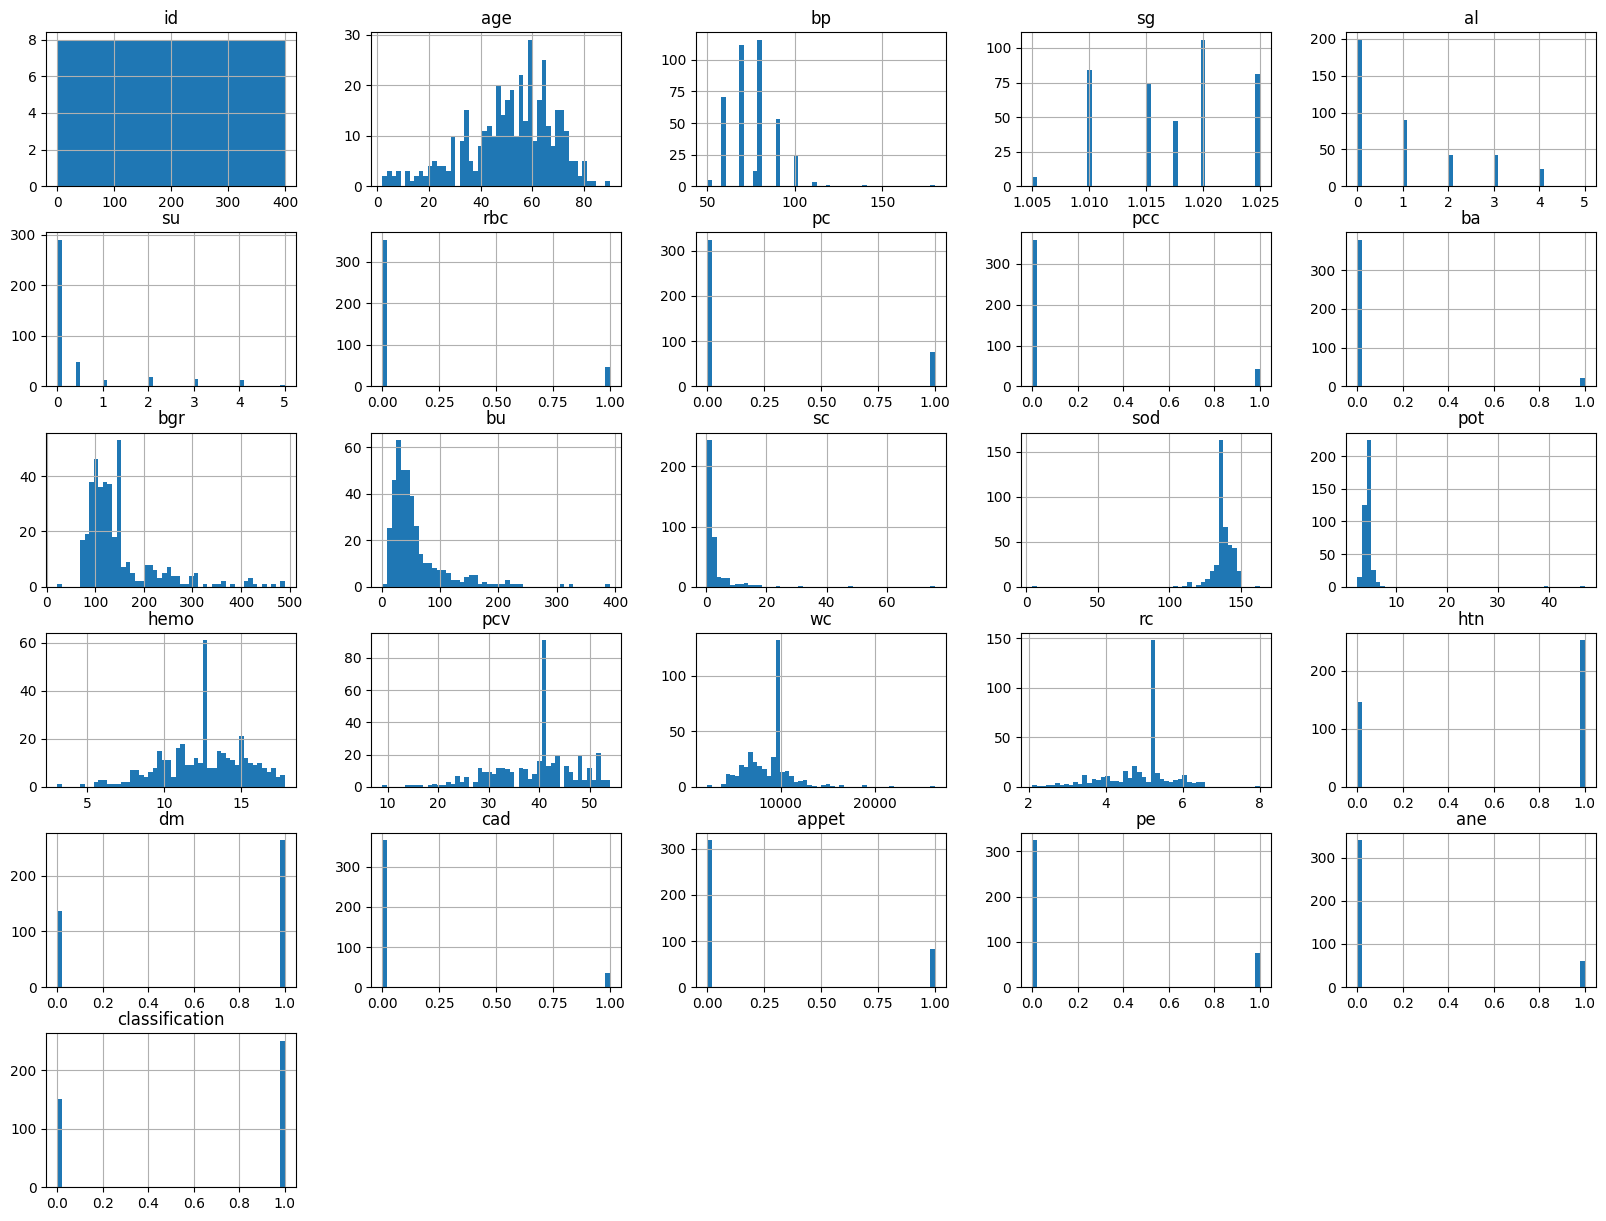

In [7]:
histogram(clean_data_kidney)

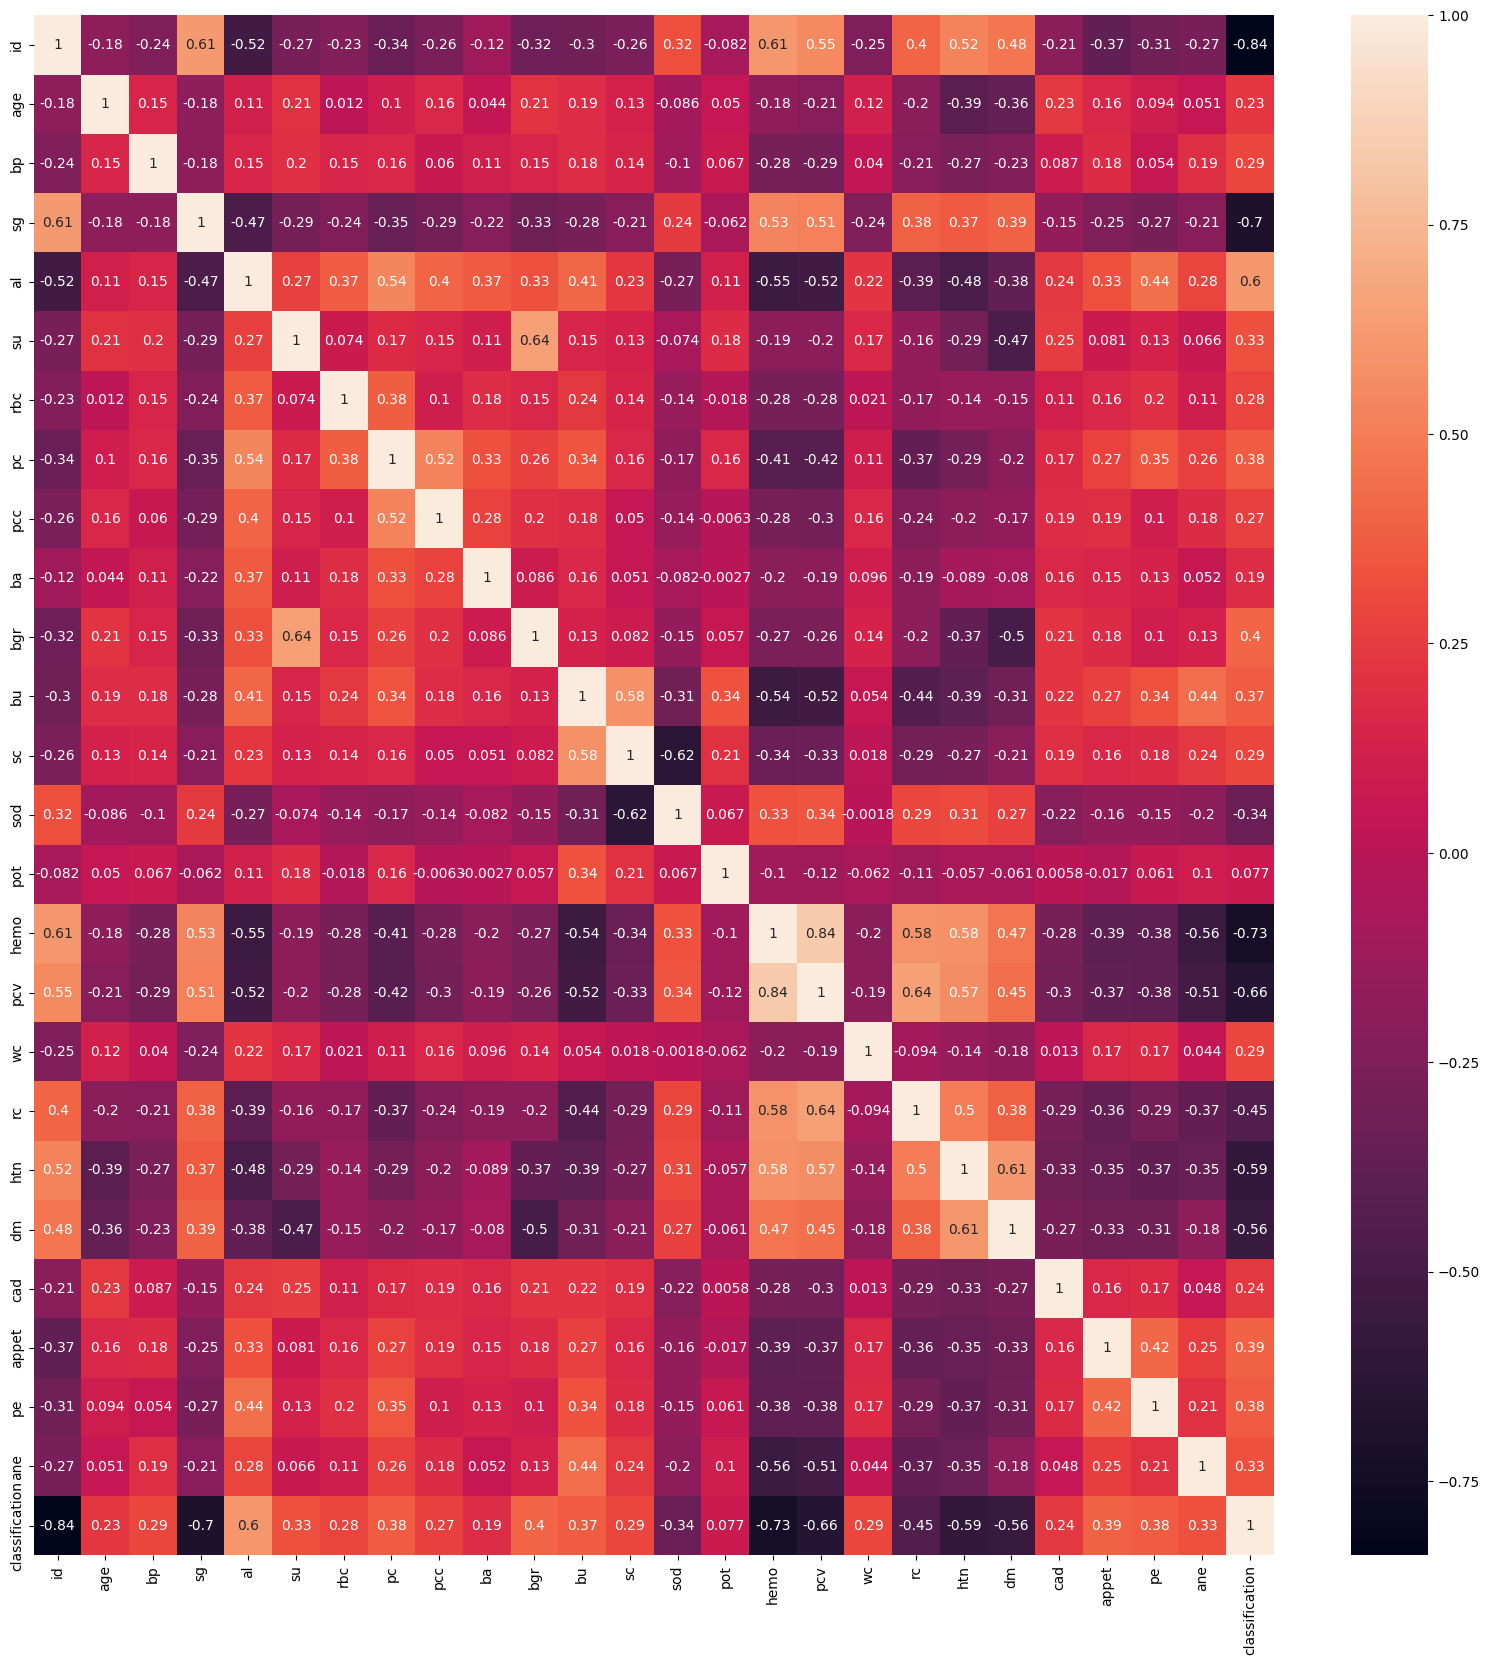

In [8]:
heatmap(clean_data_kidney)

La heatmap nous permet de visualiser quelles données semblent liées entre elles. On peut observer quelques résultats significatifs.

### 2.3 Predictions

In [9]:
X_train_kidney ,X_test_kidney, y_train_kidney, y_test_kidney = prepare_data(clean_data_kidney, 'classification')

In [23]:
Models_kidney = {'Linear Regression': LinearRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'SVM':SVC() , 'AdaBoost': AdaBoostClassifier()}

In [24]:
train_model(Models_kidney, X_train_kidney, y_train_kidney)

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training AdaBoost...
Training complete.


C:\Users\nolan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [25]:
evaluate_model(Models_kidney, X_test_kidney, y_test_kidney)

Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating SVM...
Evaluating AdaBoost...
Evaluation complete.


{'Linear Regression': 0.7524261908266865,
 'Decision Tree': 0.996875,
 'Random Forest': 1.0,
 'SVM': 0.61875,
 'AdaBoost': 0.996875}

On observe que les modèles les plus performants sont ceux de **Random Forest**, **Decision Tree** et **AdaBoost**.

### 2.4 Analysis

Confusion Matrix for Linear Regression:


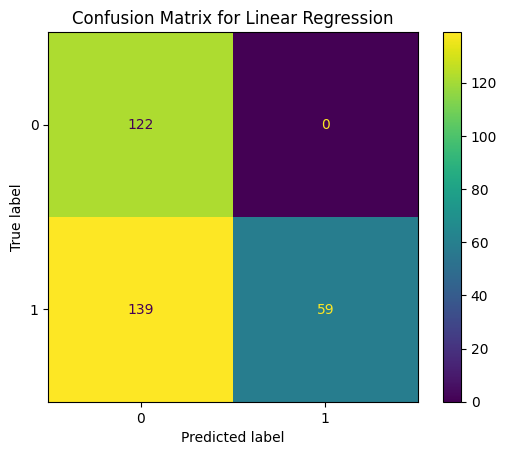

Confusion Matrix for Decision Tree:


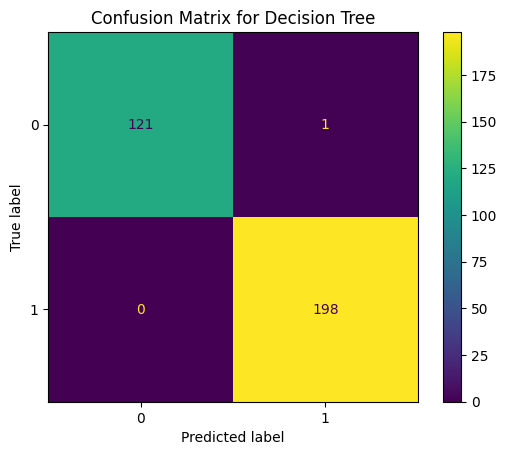

Confusion Matrix for Random Forest:


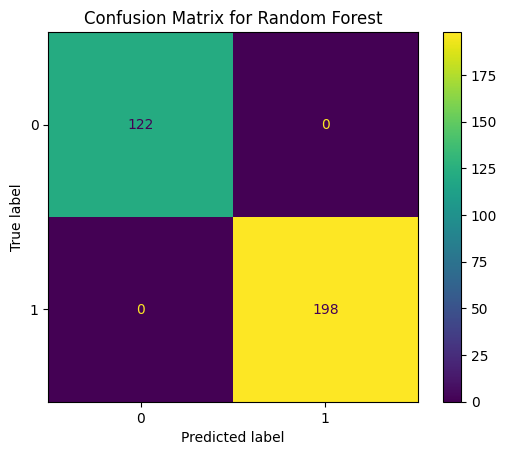

Confusion Matrix for SVM:


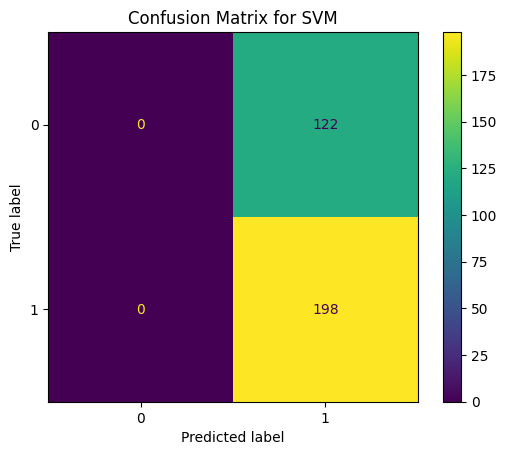

Confusion Matrix for AdaBoost:


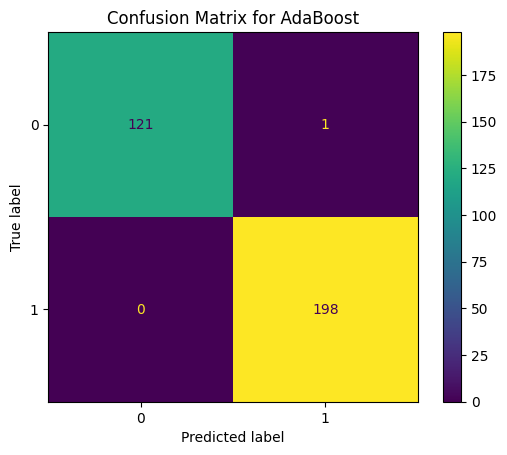

In [26]:
Confusion_matrix(X_test_kidney, y_test_kidney, Models_kidney)

On observe, grâce aux matrices de confusion, des comportements intéressants pour les modèles aux mauvaises performances.
En effet, on peut par exemple noter que la **Régression Linéaire** classe toutes les données en 1.

## 3. Banknote Authentication Dataset
### 3.1 Preprocessing

In [12]:
data_banknote = load_data_banknote()

### 3.2 Explore Data

In [13]:
data_banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [14]:
data_banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [15]:
data_banknote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


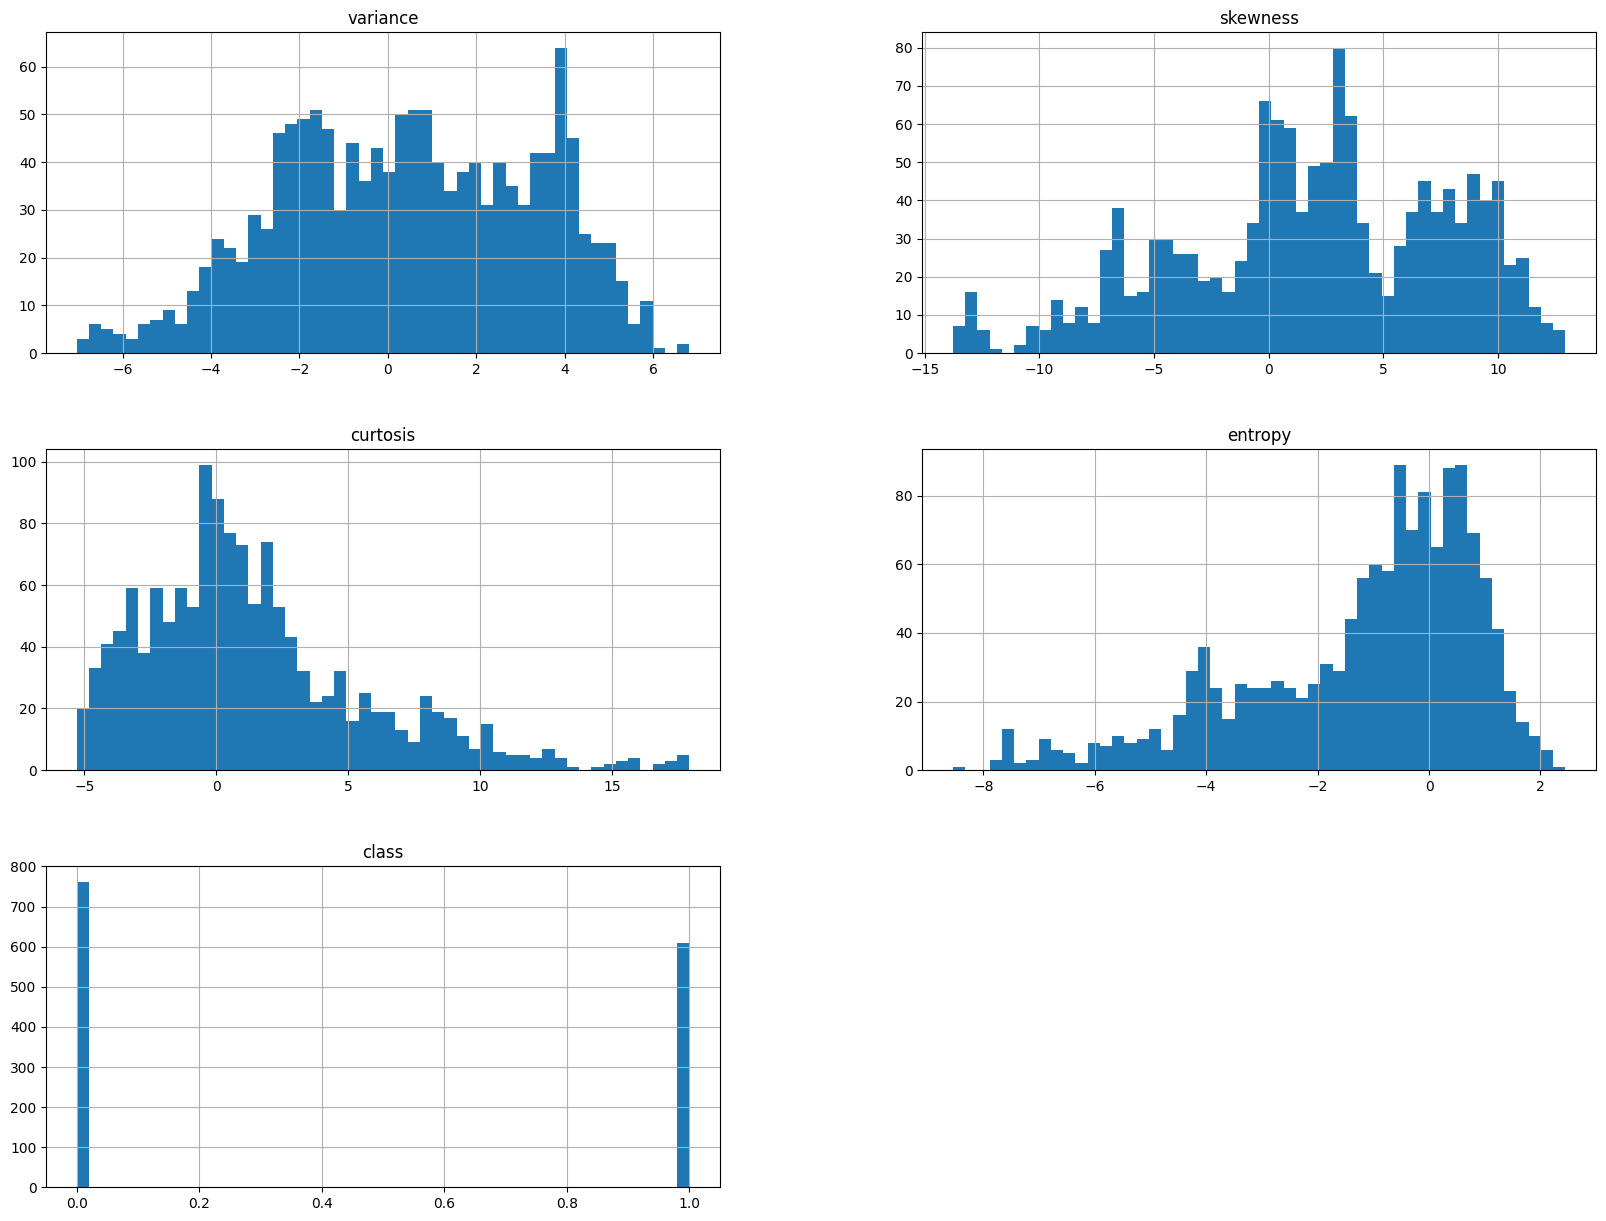

In [16]:
histogram(data_banknote)

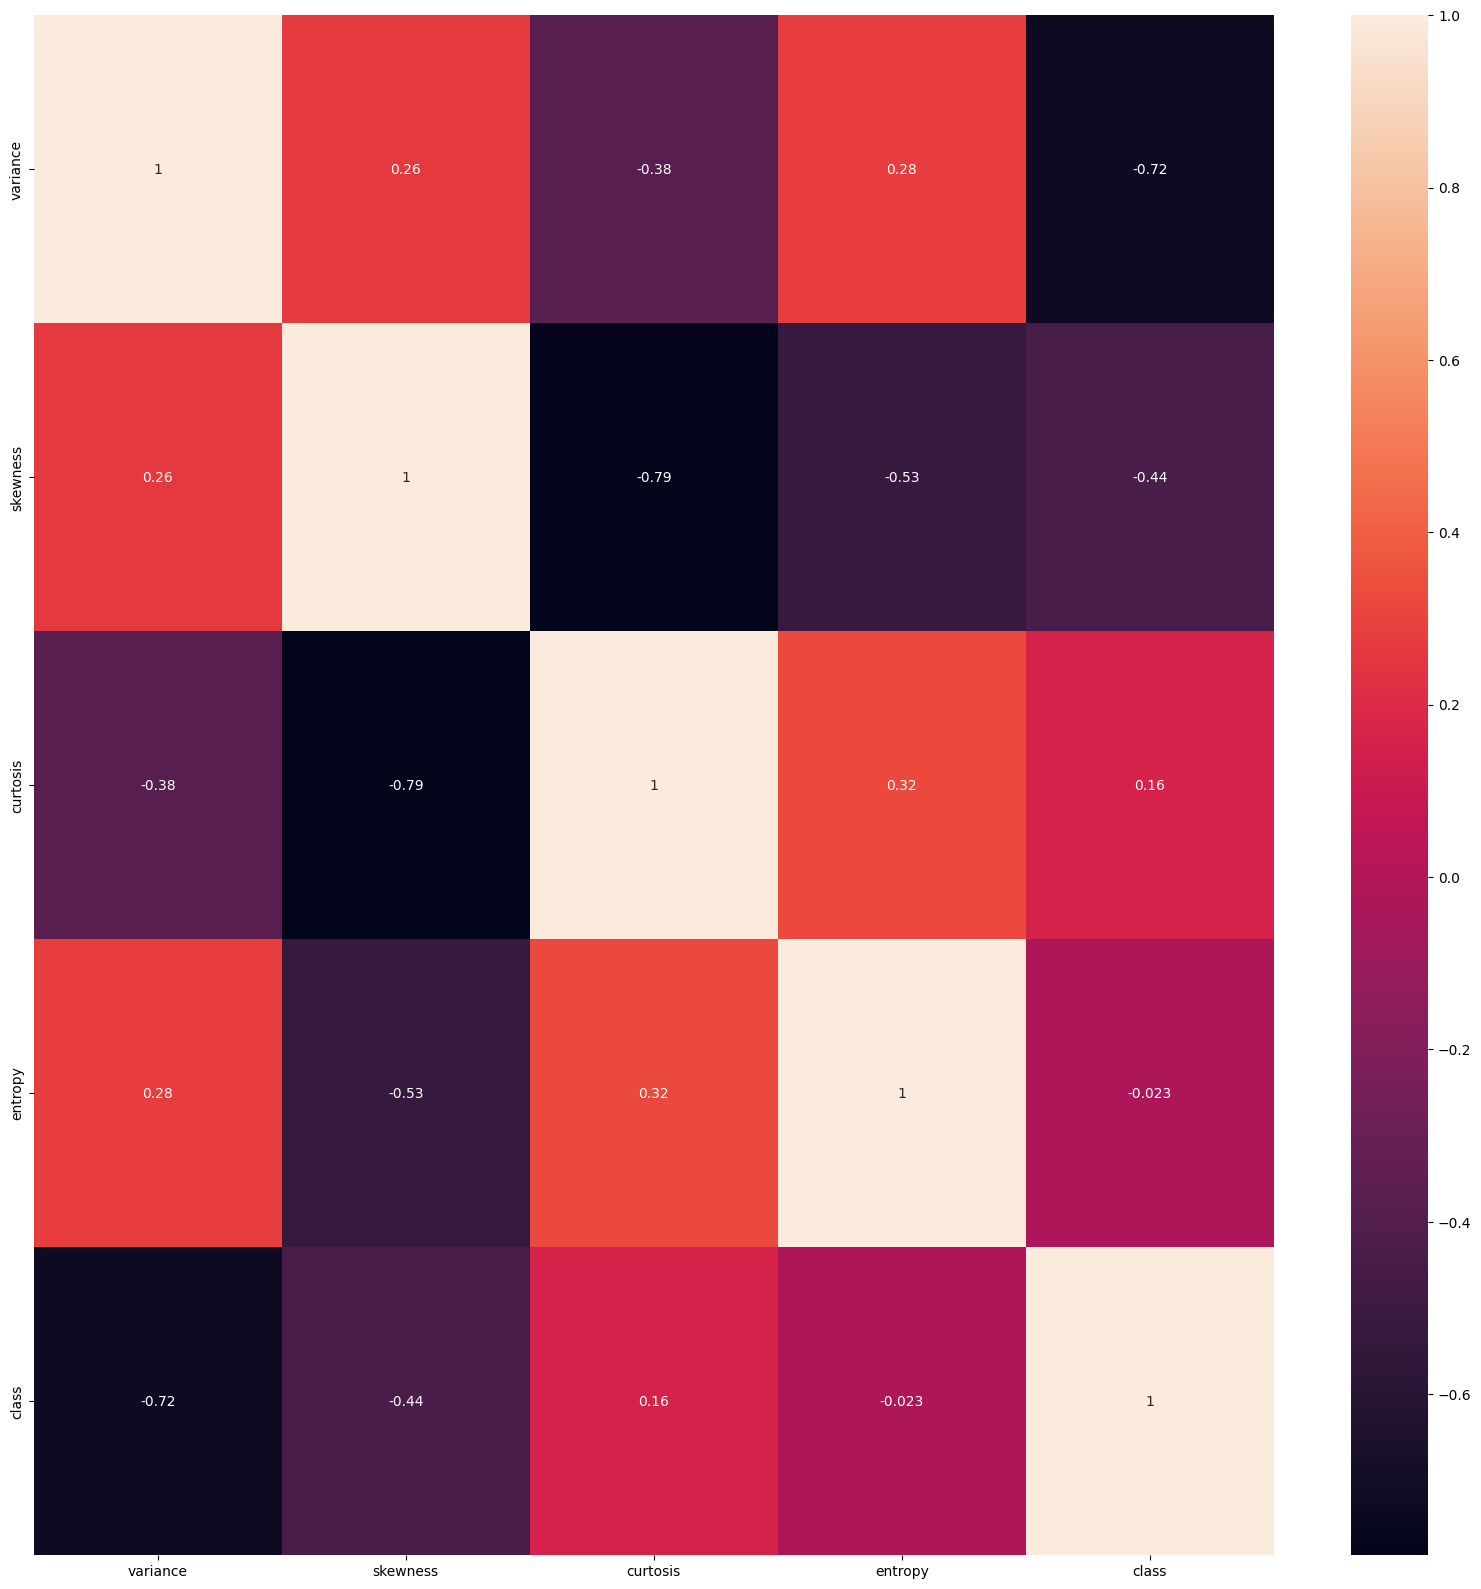

In [17]:
heatmap(data_banknote)

La heatmap nous permet de visualiser quelles données semblent liées entre elles. On peut observer quelques résultats significatifs.

### 3.3 Predictions

In [18]:
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote = prepare_data(data_banknote, 'class')

In [27]:
Models_banknote = {'Linear Regression': LinearRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'SVM':SVC() , 'AdaBoost': AdaBoostClassifier(), 'MLP': MLPClassifier()}

In [28]:
train_model(Models_banknote, X_train_banknote, y_train_banknote)

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training AdaBoost...


C:\Users\nolan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training MLP...
Training complete.


C:\Users\nolan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
evaluate_model(Models_banknote, X_test_banknote, y_test_banknote)

Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating SVM...
Evaluating AdaBoost...
Evaluating MLP...
Evaluation complete.


{'Linear Regression': 0.8622435044998544,
 'Decision Tree': 0.9443938012762079,
 'Random Forest': 0.9854147675478578,
 'SVM': 0.9881494986326345,
 'AdaBoost': 0.9762989972652689,
 'MLP': 1.0}

Ici les meilleurs résultats sont obtenues avec le **MLP** qui obtient une précision de 100%.

### 3.4 Analysis

Les matrices de confusion nous permettent de visualiser les erreurs de type I et de type II, ce que la précision seule ne permet pas.

Confusion Matrix for Linear Regression:


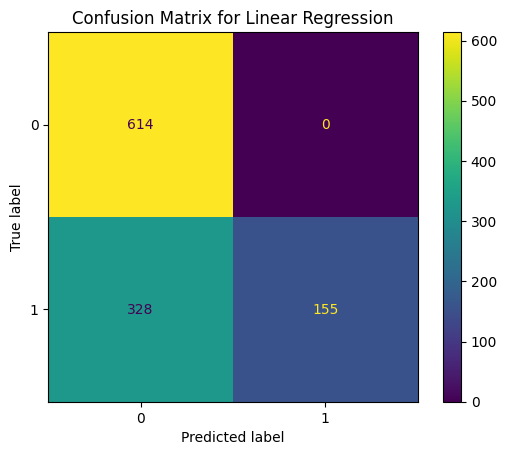

Confusion Matrix for Decision Tree:


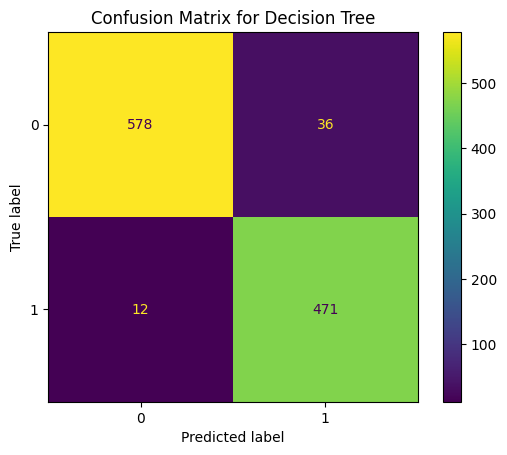

Confusion Matrix for Random Forest:


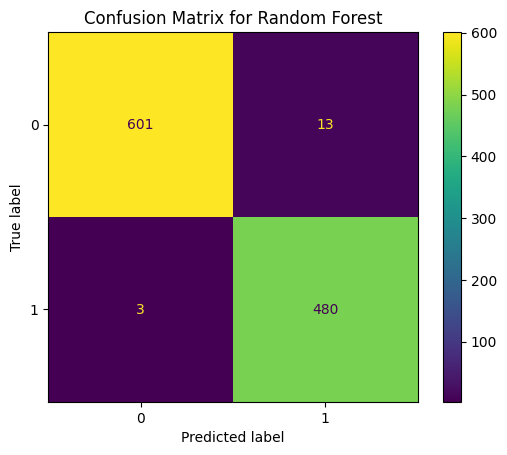

Confusion Matrix for SVM:


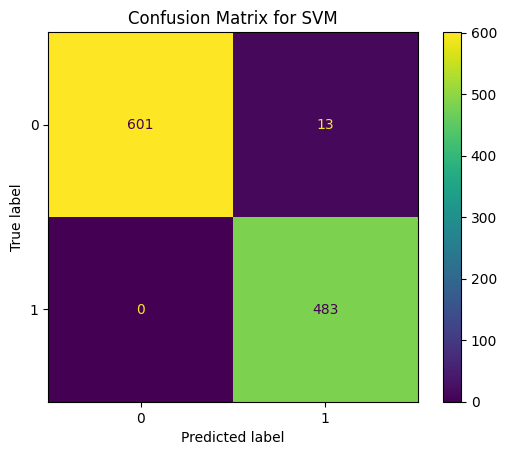

Confusion Matrix for AdaBoost:


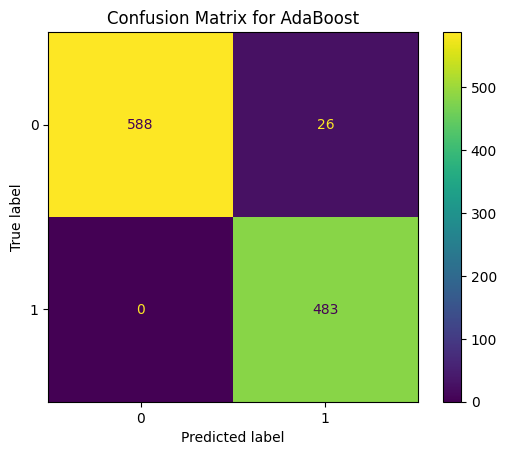

Confusion Matrix for MLP:


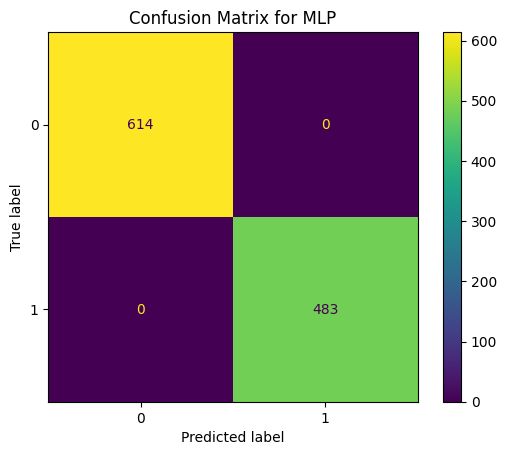

In [21]:
Confusion_matrix(X_test_banknote, y_test_banknote, Models_banknote)